In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read in the breast cancer data

In [3]:
dat = pd.read_csv("breastcancer.txt", header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'breastcancer.txt'

In [ ]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

dat.columns = col_names

In [ ]:
dat.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
dat.describe()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Drop the ID column, which isn't useful to us

In [ ]:
dat.drop("Id", axis = 1, inplace = True)

In [ ]:
dat["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

Re-encode our Class variable to just 0 (no cancer) or 1 (cancer)

In [ ]:
dat["Class"] = dat["Class"].replace([2,4],[0,1])

Plot the data

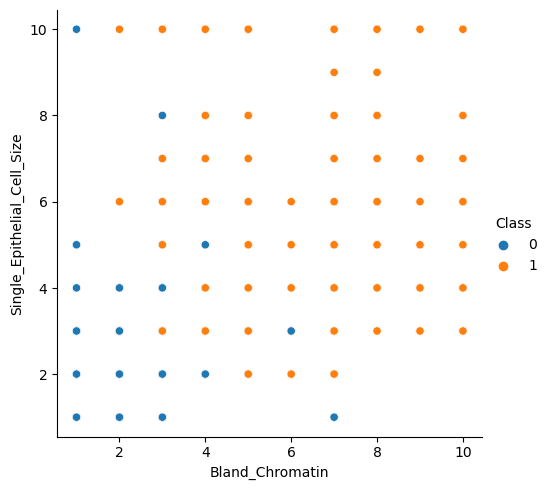

In [ ]:
sns.relplot(data = dat, x = "Bland_Chromatin", y = "Single_Epithelial_Cell_Size", hue = "Class");

This plot suggests that we only have a handful of observations, one at each integer value of our variables.

We know we have much more data however, so let's add some random noise to the points (Jitter). 

In [ ]:
# Generate random samples from a normal distribution of mean 0 and SD .1
xnoise = np.random.normal(0, .1, size = len(dat))
ynoise = np.random.normal(0, .1, size = len(dat))

Add the noise to the data and replot

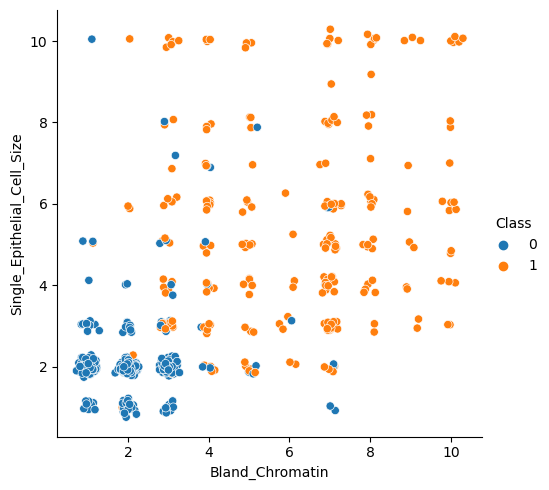

In [ ]:
new_x = dat["Bland_Chromatin"] + xnoise
new_y = dat["Single_Epithelial_Cell_Size"] + ynoise

sns.relplot(data = dat, x = new_x, y = new_y, hue = "Class");

Using these data, we can create a decision surface using KNN.

In [ ]:
# Import necessary functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
X = dat[["Bland_Chromatin", "Single_Epithelial_Cell_Size"]]
y = dat["Class"]

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

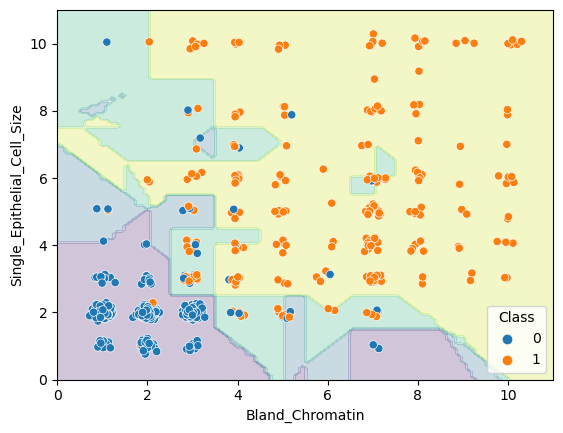

In [ ]:
DecisionBoundaryDisplay.from_estimator(clf, X, alpha=0.25)
sns.scatterplot(x = dat["Bland_Chromatin"] + xnoise, y = dat["Single_Epithelial_Cell_Size"] + ynoise, hue = dat["Class"]);

We can visualize what happens to the decision surface as K increases

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 25)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=25)

<Axes: xlabel='Bland_Chromatin', ylabel='Single_Epithelial_Cell_Size'>

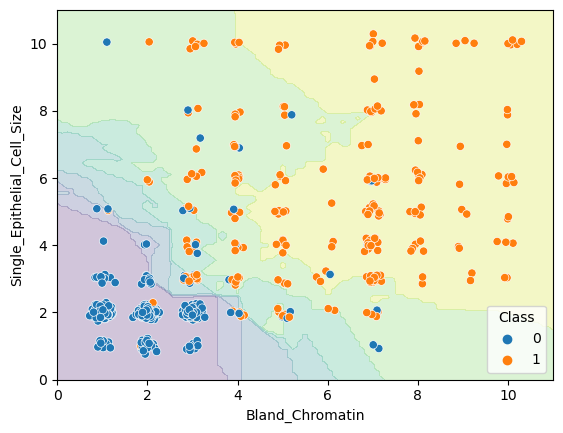

In [ ]:
DecisionBoundaryDisplay.from_estimator(clf, X, alpha=0.25)
sns.scatterplot(x = dat["Bland_Chromatin"] + xnoise, y = dat["Single_Epithelial_Cell_Size"] + ynoise, hue = dat["Class"])

### Distance

As a preamble to you writing your own KNN classifier, we should first look at how to calculate distance between two points.

$$dist = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $$

In [ ]:
def distance(p1, p2):
   return np.sqrt(np.sum((p1 - p2)**2))

In [ ]:
nba = pd.read_csv("nba.csv")

In [ ]:
row1 = nba.iloc[:,9:27].sample(1)
row1

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
2159,37,96,0.385,9,36,0.25,23,32,0.719,19,40,59,21,8,9,16,26,106


In [ ]:
row2 = nba.iloc[:,9:27].sample(1)
row2

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
2037,35,84,0.417,13,35,0.371,13,19,0.684,7,36,43,19,7,5,17,18,96


In [ ]:
np.array(row1) - np.array(row2)

array([[ 2.   , 12.   , -0.032, -4.   ,  1.   , -0.121, 10.   , 13.   ,
         0.035, 12.   ,  4.   , 16.   ,  2.   ,  1.   ,  4.   , -1.   ,
         8.   , 10.   ]])

In [ ]:
distance(np.array(row1), np.array(row2))

32.18721625117649

Now let's look at how the distance between two points changes as we increase the number of variables associated with the point.

In [ ]:
distances = np.empty(0)

# Loop a number of times equal to the number of variables in the data
for i in np.arange(2,np.array(row1).size):
    
    dis = distance(np.array(row1.iloc[:,0:i]), np.array(row2.iloc[:,0:i]))
    
    distances = np.append(distances, dis)

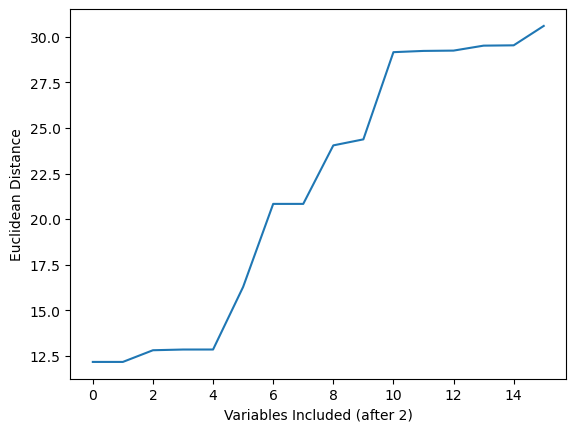

In [ ]:
plt.plot(distances)
plt.ylabel("Euclidean Distance")
plt.xlabel("Variables Included (after 2)");

**Does the distance ever decrease between points as more variables are included?**